In [218]:
from PIL import Image
import os, os.path
import numpy as np
import matplotlib.pyplot as plt
from ImageProcessing import ImageProcessor
import cv2
from skimage.segmentation import slic, mark_boundaries
from skimage.data import astronaut
from skimage.color import label2rgb

In [12]:
imgs = []
imgs_cv_gauss = []
print(os.getcwd())
for dirs in os.listdir('./data'):
    imgs.append(np.asarray(Image.open(os.getcwd() + '/data/' + dirs)))
    imgs_cv_gauss.append(cv2.cvtColor(cv2.imread('./data/'+dirs), cv2.COLOR_BGR2RGB ))

/home/nati/Desktop/Crochet/server


In [62]:
imgs_cv = []
parm = 15

for img in imgs_cv_gauss:
    dim = img.shape[:2]
    # print("Aspect = ", dim[0]/dim[1])
    dim = (dim[1]//parm, dim[0]//parm)
    # print(dim)
    
    img_new = cv2.bilateralFilter(img_new, 10, 75, 75)

    kernel = np.ones((5,5),np.uint8)
    img_new = cv2.erode(img_new, kernel, iterations=1)
    img_new = cv2.dilate(img_new, kernel, iterations=1)

    img_new = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)

    # img_new = cv2.medianBlur(img, 5)
    # img_new = cv2.fastNlMeansDenoisingColored(img_new, None, 3, 3, 7, 15)
    
    imgs_cv.append(img_new)

In [26]:
print(imgs_cv[1])

[[[255 209  31]
  [255 209  32]
  [255 209  32]
  ...
  [255 214  44]
  [255 214  44]
  [255 214  44]]

 [[255 209  32]
  [255 209  32]
  [255 209  32]
  ...
  [255 214  44]
  [255 214  44]
  [255 214  44]]

 [[255 209  32]
  [255 209  32]
  [255 209  32]
  ...
  [255 214  44]
  [255 214  44]
  [255 214  44]]

 ...

 [[255 213  50]
  [255 213  50]
  [255 213  50]
  ...
  [255 212  56]
  [255 212  56]
  [255 212  56]]

 [[255 213  50]
  [255 213  50]
  [255 213  50]
  ...
  [255 212  56]
  [255 212  56]
  [255 212  56]]

 [[255 213  50]
  [255 213  50]
  [255 213  50]
  ...
  [255 212  56]
  [255 212  56]
  [255 212  56]]]


1040 1040 dims


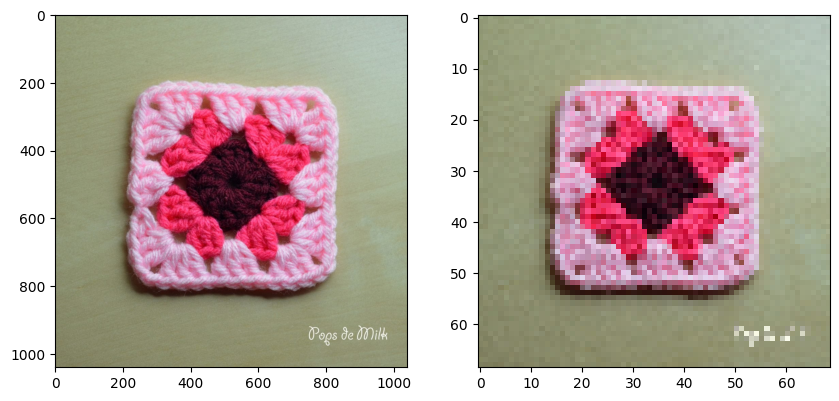

3000 3000 dims


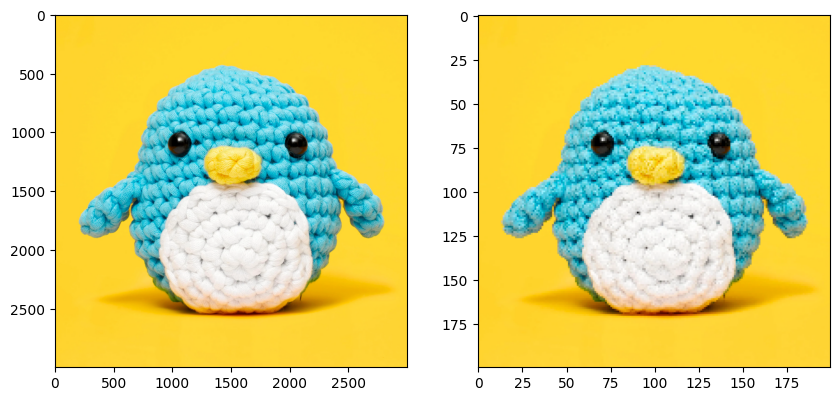

1242 839 dims


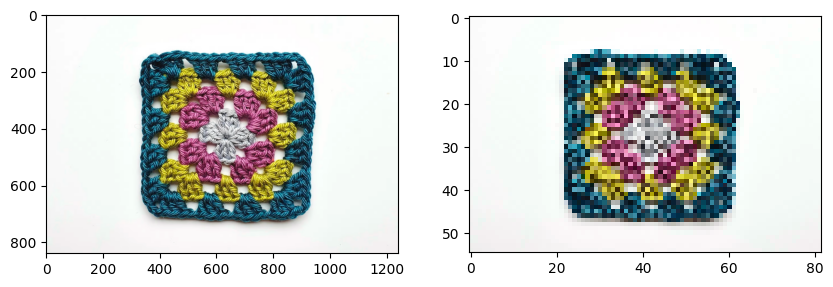

1060 1060 dims


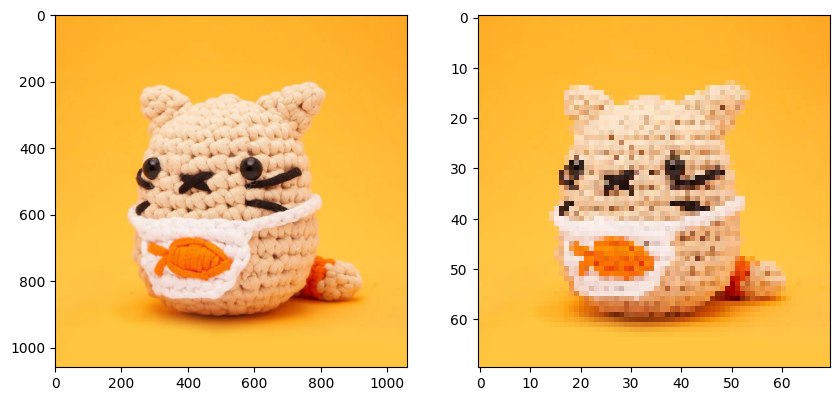

In [63]:
for ind, img in enumerate(imgs):
    imageProcesser = ImageProcessor(img, img.shape[1], img.shape[0], mode = 'np')
    # fig, axs = plt.subplots(1, 2, figsize=(10, 8))

    # axs[0].imshow(img)
    # axs[1].imshow(imageProcesser.pixel_data)

    fig1, axs1 = plt.subplots(1, 2, figsize=(10, 8))
    axs1[0].imshow(imgs_cv_gauss[ind])
    axs1[1].imshow(imgs_cv[ind])
    

    plt.show()


In [ ]:
""" 
1. similar to the eroding method, have cycles 

- Iterate through pixels and label each as groups of similar color. Similar color 
is a threshold within each other for all channels.
- Do multiple cycles of this

2. Do edge detection, where the edge extends at least 10 pixels.

3. For every pixel that is not an edge color it as the mode of the neighborhood

"""

In [132]:

# contains the label for the group and all the similar colors to then take the average
# {key: {colors: [], avg: int}}

In [195]:
def colorSimplify(c1, colorScheme, threshold = 10):
    # r1, g1, b1 = c1
    h1, l1, s1 = c1
    for c2 in colorScheme:
        # r2, g2, b2 = c2
        h2, l2, s2 = c2
        if abs(h1 - h2) < threshold: 
            return c2
        # if abs(s1 - s2) > threshold: continue
        # if abs(l1 - l2) > threshold: continue
        
    
    colorScheme.append(c1)
    return c1
    


In [111]:
x = np.zeros((55, 82, 3))
x[1][1] = [192]

In [155]:
cv2.cvtColor(imgs_cv[1], cv2. COLOR_BGR2HLS)

array([[[ 96, 145, 255],
        [ 96, 145, 255],
        [ 96, 146, 255],
        ...,
        [ 96, 150, 255],
        [ 96, 150, 255],
        [ 96, 150, 255]],

       [[ 96, 146, 255],
        [ 96, 146, 255],
        [ 96, 146, 255],
        ...,
        [ 96, 150, 255],
        [ 96, 150, 255],
        [ 96, 150, 253]],

       [[ 96, 146, 255],
        [ 96, 146, 255],
        [ 96, 146, 255],
        ...,
        [ 96, 150, 255],
        [ 96, 150, 255],
        [ 96, 150, 255]],

       ...,

       [[ 96, 151, 255],
        [ 96, 153, 253],
        [ 96, 153, 253],
        ...,
        [ 96, 155, 255],
        [ 96, 155, 255],
        [ 96, 155, 255]],

       [[ 96, 152, 255],
        [ 96, 153, 253],
        [ 96, 153, 253],
        ...,
        [ 96, 155, 255],
        [ 96, 156, 255],
        [ 96, 155, 255]],

       [[ 96, 152, 255],
        [ 96, 152, 255],
        [ 96, 151, 255],
        ...,
        [ 96, 156, 255],
        [ 96, 156, 255],
        [ 96, 156, 255]]

In [173]:
def simplify(img, cycles = 2):
    height, width = img.shape[:2] # what ever the appropriate way to get dims
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    # new_img = np.int32(img)
    print(width, height)


    for cyc in range(cycles):
        colorScheme = []
        for col_ind, col in enumerate(img):
            for row_ind, color in enumerate(col):
                new_img[col_ind][row_ind] = colorSimplify(color, colorScheme)
    
    return new_img

In [294]:
def colorSimple(c1, colorScheme, threshold = 10):
    r1, g1, b1 = c1
    # h1, l1, s1 = c1
    for c2 in colorScheme:
        r2, g2, b2 = c2
        # h2, l2, s2 = c2
        if abs(r1 - r2) > threshold: continue
        if abs(g1 - g2) > threshold: continue
        if abs(b1 - b2) > threshold: continue
        return c2
        
    
    colorScheme.append(c1)
    return c1

def reduce(new_img, img):
    unique = np.unique(new_img)
    final = np.int32(img)

    colorScheme = []
    for u in np.asarray((unique)).T:
        inds = np.where(new_img == u)
        avg_col = np.mean(final[inds], axis = 0, dtype=np.int32)
        final[inds] = colorSimple(avg_col, colorScheme)

    return final

400.0 4761


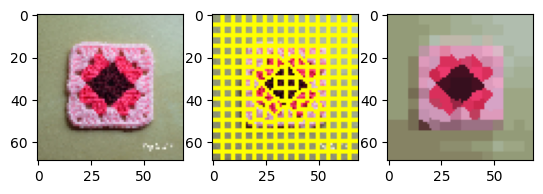

500.0 40000


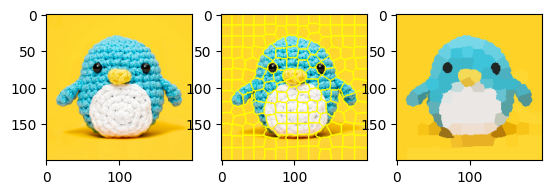

400.0 4510


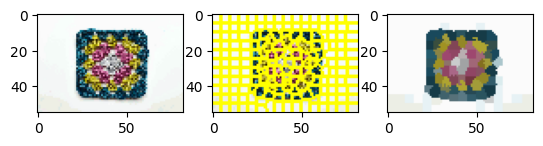

400.0 4900


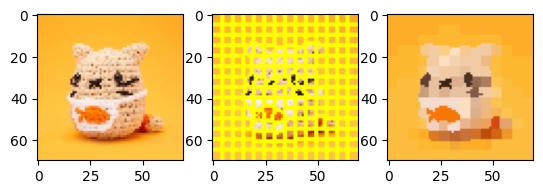

In [311]:
for ind, img in enumerate(imgs_cv):
    # if ind != 1:    
    # new_img = simplify(img)

    # fig1, axs1 = plt.subplots(1, 2, figsize=(10, 8))
    # axs1[0].imshow(img)
    # axs1[1].imshow(new_img.astype(np.int32))
    # plt.show()

    height, width = img.shape[:2]
    
    # nseg = height*width // 45
    nseg = np.ceil(np.log10(height*width)) * 100
    print(nseg, height*width)
    new_img = slic(img,n_segments=170,compactness=80)

    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.subplot(1,3,2)
    
    # plt.imshow(label2rgb(new_img, img, kind = 'avg'))
    plt.imshow(mark_boundaries(img, new_img))

    final = reduce(new_img, img)
    plt.subplot(1,3,3)
    plt.imshow(final)
    plt.show()
    

- Generate segments by looking for large differences in textures/hues.
- Within segments smooth it out a lot

1. edge detection
2. within edge boundaries, similarity of features.
3. average over segments